# **<span style="color: green;">Predictive Regression Tool Using Gradio</span>**

![](https://i.imgur.com/spUaGoh.png)

## **1. Medical Insurance Cost**
---
![](https://storage.googleapis.com/kaggle-datasets-images/8129551/12853160/83b336ea7f928c215b00bfb0681810f1/dataset-cover.jpg?t=2025-08-24-12-28-03)

*(https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset)*


For Assessment 2, we are required to solve a Machine Learning problem of any type. For this project, I decided to work with a Regression Task. We were also instructed to use Gradio to work with the Machine Learning Model.

### **1.1 Importing**
---

In [1]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from bayes_opt import BayesianOptimization

### **1.2 Printing CSV and Data Checking**
---

In [2]:
mic = pd.read_csv('/kaggle/input/medical-insurance-cost-dataset/insurance.csv')
print(mic.shape)
print(mic.columns)
mic.head()

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


There are 1338 rows, and seven columns with the categories: age, sex, bmi, children, smoker, region, and charges. Since ML trains on numerical data, the categorical features will have to be encoded.

#### **1.21 Cleaning Data**
---
It is still good to check if any cells have missing or unsupported data. The isna().sum() methods from pandas are used together to check for missing values.

In [3]:
mic.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### **1.3 Regression Task**
---

In [4]:
X = mic.drop('charges', axis=1)
X = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)
y = mic['charges']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

LR = LinearRegression().fit(train_X, train_y)

DTR = DecisionTreeRegressor().fit(train_X, train_y)

RF = RandomForestRegressor().fit(train_X, train_y)

#### **1.31 Visualization**
---
Performing a visualization before doing modeling may help us understand what patterns the models are learning.

##### **1.31a Categorical Features**

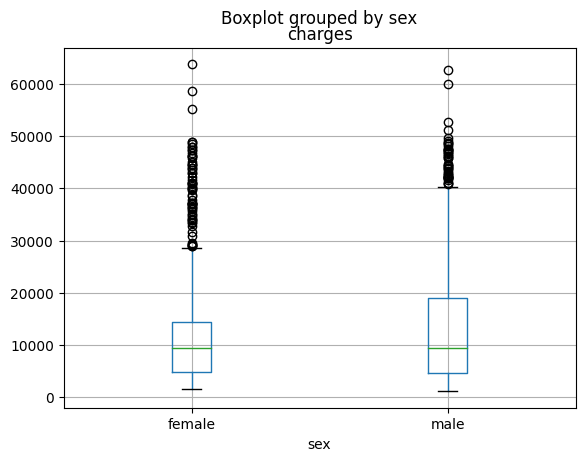

In [5]:
mic.boxplot(column='charges', by='sex')
plt.show()

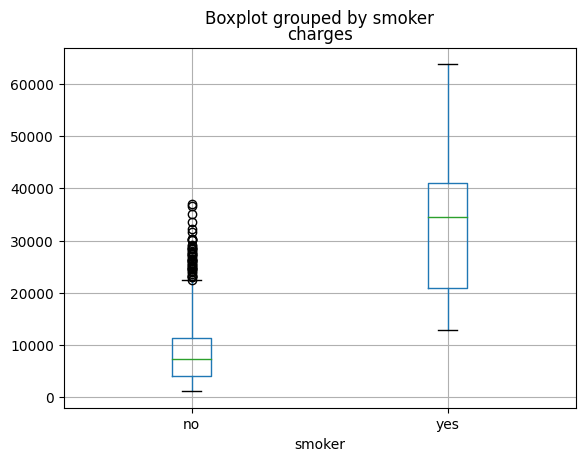

In [6]:
mic.boxplot(column='charges', by='smoker')
plt.show()

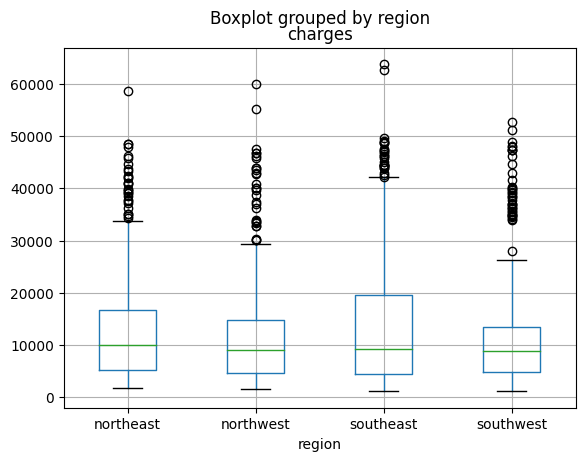

In [7]:
mic.boxplot(column='charges', by='region')
plt.show()

##### **1.31b Numerical Features**

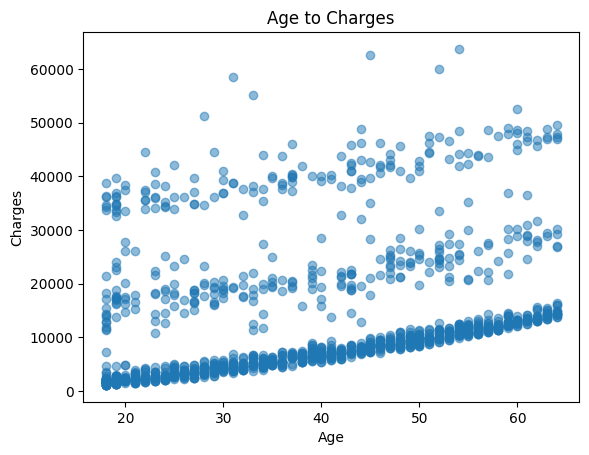

In [8]:
plt.scatter(X['age'], y, alpha=0.5)
plt.title("Age to Charges")
plt.ylabel('Charges')
plt.xlabel('Age')
plt.show()

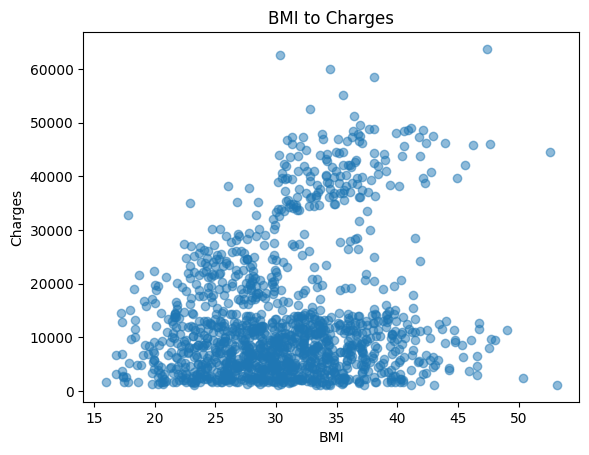

In [9]:
plt.scatter(X['bmi'], y, alpha=0.5)
plt.title("BMI to Charges")
plt.ylabel('Charges')
plt.xlabel('BMI')
plt.show()

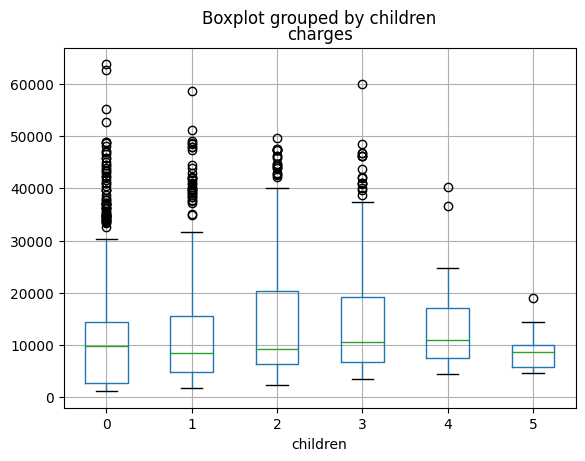

In [10]:
mic.boxplot(column='charges', by='children')
plt.show()

### **1.4 Model Performance & Optimization**
---
The accuracy of the models have to be determined to see if the tool is reliable and ready to be deployed for people to use. The provided function works with sklearn's imported methods, evaluating the different models that were previously named. 

In [11]:
def evaluate(model, X, y):
    preds = model.predict(X)
    r2 = r2_score(y, preds)
    mae = mean_absolute_error(y, preds)
    mse = mean_squared_error(y, preds)
    rmse = np.sqrt(mean_squared_error(y, preds))
    return r2, mae, mse, rmse

# Linear Regression ------------------------------
print("\x1B[4m" + "\nLinear Regression" + "\x1B[0m") 
r2_lr_tr, mae_lr_tr, mse_lr_tr, rmse_lr_tr = evaluate(LR, train_X, train_y) 
print("\033[1m" + "Train:" + "\033[0m")
print(f" R²: {r2_lr_tr:.3f}") 
print(f" MAE: {mae_lr_tr:,.2f}") 
print(f" MSE: {mse_lr_tr:,.2f}") 
print(f" RMSE: {rmse_lr_tr:,.2f}")

r2_lr, mae_lr, mse_lr, rmse_lr = evaluate(LR, val_X, val_y) 
print("\033[1m" + "\nValidation:" + "\033[0m")
print(f"R²: {r2_lr:.3f}") 
print(f"MAE: {mae_lr:,.2f}") 
print(f"MSE: {mse_lr:,.2f}")
print(f"RMSE: {rmse_lr:,.2f}")
    
# Decision Tree ------------------------------
print("\x1B[4m" + "\nDecision Tree" + "\x1B[0m") 
r2_dt_tr, mae_dt_tr, mse_dt_tr, rmse_dt_tr = evaluate(DTR, train_X, train_y) 
print("\033[1m" + "Train:" + "\033[0m")
print(f"R²: {r2_dt_tr:.3f}") 
print(f"MAE: {mae_dt_tr:,.2f}") 
print(f"MSE: {mse_dt_tr:,.2f}") 
print(f"RMSE: {rmse_dt_tr:,.2f}")

r2_dt, mae_dt, mse_dt, rmse_dt = evaluate(DTR, val_X, val_y) 
print("\033[1m" + "\nValidation:" + "\033[0m")
print(f"R²: {r2_dt:.3f}") 
print(f"MAE: {mae_dt:,.2f}") 
print(f"MSE: {mse_dt:,.2f}") 
print(f"RMSE: {rmse_dt:,.2f}")

# Random Forest ------------------------------
print("\x1B[4m" + "\nRandom Forest" + "\x1B[0m") 
r2_rf_tr, mae_rf_tr, mse_rf_tr, rmse_rf_tr = evaluate(RF, train_X, train_y) 
print("\033[1m" + "Train:" + "\033[0m")
print(f"R²: {r2_rf_tr:.3f}") 
print(f"MAE: {mae_rf_tr:,.2f}") 
print(f"MSE: {mse_rf_tr:,.2f}") 
print(f"RMSE: {rmse_rf_tr:,.2f}")

r2_rf, mae_rf, mse_rf, rmse_rf = evaluate(RF, val_X, val_y) 
print("\033[1m" + "\nValidation:" + "\033[0m")
print(f"R²: {r2_rf:.3f}") 
print(f"MAE: {mae_rf:,.2f}") 
print(f"MSE: {mse_rf:,.2f}")
print(f"RMSE: {rmse_rf:,.2f}")


Linear Regression
Train:
 R²: 0.742
 MAE: 4,208.23
 MSE: 37,277,681.70
 RMSE: 6,105.55

Validation:
R²: 0.784
MAE: 4,181.19
MSE: 33,596,915.85
RMSE: 5,796.28

Decision Tree
Train:
R²: 0.998
MAE: 29.57
MSE: 244,239.55
RMSE: 494.21

Validation:
R²: 0.678
MAE: 3,387.53
MSE: 49,936,118.87
RMSE: 7,066.55

Random Forest
Train:
R²: 0.975
MAE: 1,045.04
MSE: 3,671,261.63
RMSE: 1,916.05

Validation:
R²: 0.863
MAE: 2,550.95
MSE: 21,203,529.84
RMSE: 4,604.73


#### **1.41 Optimization**
---
With evaluation metrics, lower values are better for MAE, MSE, and RMSE. As for the R² score, it should be higher. Out of the models evaluated so far, Random Forest had the best performance out of the box, with the Decision Tree model performing the least. The Decision Tree and Random Forest models will be optimized as they can be tuned with hyperparameters. The Bayesian Optimization library is used after installing it through the console. Bayesian Optimization was used over Grid Search and Random Search to effectively find the optimal hyperparameters for the models.

##### **1.41a Decision Tree Optimization** >> (Hyperparameter Tuning)
---

In [12]:
# Code adapted from GeeksforGeeks, using bayesian optimization (https://www.geeksforgeeks.org/machine-learning/how-to-tune-a-decision-tree-in-hyperparameter-tuning/)
def dt_mic(max_depth, min_samples_split, min_samples_leaf):
    estimator = DecisionTreeRegressor(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=2
    )
    cval = cross_val_score(estimator, train_X, train_y, scoring='neg_mean_squared_error', cv=5) # Minimizing MSE is equivalent to maximizing negative-MSE
    return cval.mean()

param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

dt_optimizer = BayesianOptimization(
    f=dt_mic,
    pbounds=param_bounds,
    random_state=42,
)

dt_optimizer.maximize(n_iter=25, init_points=5)
best_params_dt = dt_optimizer.max['params']
best_params_dt['max_depth'] = int(best_params_dt['max_depth'])
best_params_dt['min_samples_split'] = int(best_params_dt['min_samples_split'])
best_params_dt['min_samples_leaf'] = int(best_params_dt['min_samples_leaf'])
best_score_dt = dt_optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_dt}")
print(f"Best Score (Bayesian Optimization): {best_score_dt}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -2.46e+07 | 8.1162622 | 19.112857 | 14.907884 |
| 2         | -3.28e+07 | 12.374511 | 4.8083355 | 3.9638958 |
| 3         | -2.57e+07 | 2.1035886 | 17.591170 | 12.421185 |
| 4         | -2.42e+07 | 14.453378 | 2.3705208 | 19.428287 |
| 5         | -2.96e+07 | 16.816410 | 5.8221039 | 4.4546743 |
| 6         | -2.39e+07 | 11.385296 | 10.542765 | 20.0      |
| 7         | -2.39e+07 | 20.0      | 14.138448 | 20.0      |
| 8         | -2.55e+07 | 20.0      | 20.0      | 9.9460183 |
| 9         | -5.67e+07 | 1.0       | 2.0       | 20.0      |
| 10        | -2.42e+07 | 11.982222 | 8.9658312 | 19.883575 |
| 11        | -5.67e+07 | 1.0       | 20.0      | 1.0       |
| 12        | -2.47e+07 | 20.0      | 5.4251767 | 14.584147 |
| 13        | -5.67e+07 | 1.0       | 20.0      | 20.0      |
| 14        | -2.49e+07 | 13.464222 | 13.229258 | 12.135924 |
| 15    

Adapting for model use
---

In [13]:
# Using the values found in the Bayesian Optimization process as hyperparameters for Decision Tree Regressor
DT_Bayes = DecisionTreeRegressor( 
    max_depth=best_params_dt['max_depth'], 
    min_samples_split=best_params_dt['min_samples_split'], 
    min_samples_leaf=best_params_dt['min_samples_leaf'], 
    random_state=42)

DT_Bayes.fit(train_X, train_y)

dt_mse_translate = -best_score_dt # Since the cross val score uses negative scoring, this turns it into a positive value
dt_rmse_translate = np.sqrt(dt_mse_translate) # Square root of mse is rmse and is closer to the values used for medical insurance cost in $USD
dt_preds = DT_Bayes.predict(val_X)
dt_r2 = r2_score(val_y, dt_preds) 

print(f"Optimized R²: {dt_r2:,.3f}")
print(f"Optimized RMSE: {dt_rmse_translate:,.2f}")

Optimized R²: 0.867
Optimized RMSE: 4,829.76


##### **1.41b Random Forest Optimization** >> (Hyperparameter Tuning)
---

In [14]:
def rf_mic(n_estimators, max_depth, min_samples_split):
    estimator = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        random_state=42
    )
    cval = cross_val_score(estimator, train_X, train_y, scoring='neg_mean_squared_error', cv=5)
    return cval.mean()

param_bounds = {
    'n_estimators': (100, 500),
    'max_depth': (10, 30),
    'min_samples_split': (2, 10)
}

rf_optimizer = BayesianOptimization(
    f=rf_mic,
    pbounds=param_bounds,
    random_state=42,
)

rf_optimizer.maximize(init_points=5, n_iter=25)

best_params_rf = rf_optimizer.max['params']
best_params_rf['n_estimators'] = int(best_params_rf['n_estimators'])
best_params_rf['max_depth'] = int(best_params_rf['max_depth'])
best_params_rf['min_samples_split'] = int(best_params_rf['min_samples_split'])
best_score_rf = rf_optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_rf}")
print(f"Best Score (Bayesian Optimization): {best_score_rf}")

|   iter    |  target   | n_esti... | max_depth | min_sa... |
-------------------------------------------------------------
| 1         | -2.36e+07 | 249.81604 | 29.014286 | 7.8559515 |
| 2         | -2.45e+07 | 339.46339 | 13.120372 | 3.2479561 |
| 3         | -2.38e+07 | 123.23344 | 27.323522 | 6.8089200 |
| 4         | -2.32e+07 | 383.22903 | 10.411689 | 9.7592788 |
| 5         | -2.45e+07 | 432.97705 | 14.246782 | 3.4545997 |
| 6         | -2.34e+07 | 383.12355 | 10.428747 | 8.6841783 |
| 7         | -2.31e+07 | 387.52410 | 10.0      | 10.0      |
| 8         | -2.31e+07 | 387.50203 | 16.670786 | 10.0      |
| 9         | -2.31e+07 | 396.41384 | 14.198882 | 10.0      |
| 10        | -2.31e+07 | 395.99091 | 25.168777 | 10.0      |
| 11        | -2.47e+07 | 403.23208 | 21.595070 | 2.0       |
| 12        | -2.31e+07 | 387.63557 | 27.715969 | 10.0      |
| 13        | -2.31e+07 | 375.82364 | 25.009127 | 10.0      |
| 14        | -2.31e+07 | 365.24790 | 30.0      | 10.0      |
| 15    

Adapting for model use
---

In [15]:
# Using the values found in the Bayesian Optimization process as hyperparameters for Random Forest Regressor
RF_Bayes = RandomForestRegressor( 
    n_estimators=best_params_rf['n_estimators'], 
    max_depth=best_params_rf['max_depth'], 
    min_samples_split=best_params_rf['min_samples_split'], 
    random_state=42)

RF_Bayes.fit(train_X, train_y)

rf_mse_translate = -best_score_rf
rf_rmse_translate = np.sqrt(rf_mse_translate)
rf_preds = RF_Bayes.predict(val_X)
rf_r2 = r2_score(val_y, rf_preds) 

print(f"Optimized R²: {rf_r2:,.3f}")
print(f"Optimized RMSE: {rf_rmse_translate:,.2f}")

Optimized R²: 0.872
Optimized RMSE: 4,807.36


Optimized Models Performance
---

In [16]:
# Optimized Decision Tree ------------------------------
print("\x1B[4m" + "\nOptimized Decision Tree" + "\x1B[0m") 
r2_odt_tr, mae_odt_tr, mse_odt_tr, rmse_odt_tr = evaluate(DT_Bayes, train_X, train_y) 
print("\033[1m" + "Train:" + "\033[0m")
print(f"R²: {r2_odt_tr:.3f}") 
print(f"MAE: {mae_odt_tr:,.2f}") 
print(f"MSE: {mse_odt_tr:,.2f}") 
print(f"RMSE: {rmse_odt_tr:,.2f}")

r2_odt, mae_odt, mse_odt, rmse_odt = evaluate(DT_Bayes, val_X, val_y) 
print("\033[1m" + "\nValidation:" + "\033[0m")
print(f"R²: {r2_odt:.3f}") 
print(f"MAE: {mae_odt:,.2f}") 
print(f"MSE: {mse_odt:,.2f}") 
print(f"RMSE: {rmse_odt:,.2f}")

# Optimized Random Forest ------------------------------
print("\x1B[4m" + "\nOptimized Random Forest" + "\x1B[0m") 
r2_orf_tr, mae_orf_tr, mse_orf_tr, rmse_orf_tr = evaluate(RF_Bayes, train_X, train_y) 
print("\033[1m" + "Train:" + "\033[0m")
print(f"R²: {r2_orf_tr:.3f}") 
print(f"MAE: {mae_orf_tr:,.2f}") 
print(f"MSE: {mse_orf_tr:,.2f}") 
print(f"RMSE: {rmse_orf_tr:,.2f}")

r2_orf, mae_orf, mse_orf, rmse_orf = evaluate(RF_Bayes, val_X, val_y) 
print("\033[1m" + "\nValidation:" + "\033[0m")
print(f"R²: {r2_orf:.3f}") 
print(f"MAE: {mae_orf:,.2f}") 
print(f"MSE: {mse_orf:,.2f}")
print(f"RMSE: {rmse_orf:,.2f}")


Optimized Decision Tree
Train:
R²: 0.873
MAE: 2,420.59
MSE: 18,311,904.31
RMSE: 4,279.24

Validation:
R²: 0.867
MAE: 2,646.49
MSE: 20,594,594.98
RMSE: 4,538.13

Optimized Random Forest
Train:
R²: 0.924
MAE: 1,842.33
MSE: 10,936,379.26
RMSE: 3,307.02

Validation:
R²: 0.872
MAE: 2,542.78
MSE: 19,878,928.21
RMSE: 4,458.58


### **1.5 Functions for Gradio**
---

#### **1.51 Function 1**
---
Since the user will have to input categorical features alongside numerical inputs, they will have to be formatted accordingly. In this function, a copy of the original dataset is made, and the features are filled in correspondingly. Since age, bmi, and children are numerical features, they already work fine with the function. However, sex, smoker, and region are categorical features, which means they have to be numerical for the function to work. The problem is bypassed by checking if the user input matches the previously one-hot encoded categorical features, like sex, which is turned into sex_female or sex_male by pandas. Now that the features are numerical, they can be used in the function for model prediction.

In [17]:
def build_input(age, sex, bmi, children, smoker, region):
    input_row = pd.DataFrame(0, index=[0], columns=X.columns)

    input_row['age'] = age
    input_row['bmi'] = bmi
    input_row['children'] = children

    # one-hot categorical
    col = f"sex_{sex}"
    if col in input_row.columns:
        input_row[col] = 1

    col = f"smoker_{smoker}"
    if col in input_row.columns:
        input_row[col] = 1

    col = f"region_{region}"
    if col in input_row.columns:
        input_row[col] = 1

    return input_row

#### **1.52 Function 2**
---
This section contains the prediction function that Gradio will use. In the function, the categorical features are turned into lowercase versions to match the dataset columns. The previous function is then called, which lets the rest of the function work as explained earlier. The rest of the code is now just an if-else statement checking what model the user has chosen, wherein it will then use sklearn's predict method using the built inputs with the type of model it is for. The predictions are the target feature in the dataset, which is "charges", or the Medical Insurance Cost that the tool is trying to predict.

In [18]:
def predict(model, age, sex, bmi, children, smoker, region):
    # Dataset columns are lowercase, but user input first letters are uppercased for formatting aesthetics
    sex = sex.lower()
    smoker = smoker.lower()
    region = region.lower()

    input_df = build_input(age, sex, bmi, children, smoker, region)
    
    if model == 'Linear Regression':
        preds = LR.predict(input_df)[0]
        return f"${preds:,.2f}"
    elif model == 'Decision Tree':
        preds = DTR.predict(input_df)[0]
        return f"${preds:,.2f}"
    elif model == 'Random Forest':
        preds = RF.predict(input_df)[0]
        return f"${preds:,.2f}"
    elif model == 'Optimized DT':
        preds = DT_Bayes.predict(input_df)[0]
        return f"${preds:,.2f}"
    elif model == 'Optimized RF':
        preds = RF_Bayes.predict(input_df)[0]
        return f"${preds:,.2f}"

### **1.6 Gradio Interface**
---
To use the functions through a GUI, Gradio will be used as it provides a clean interface for deployed models.

In [19]:
inputs = [
    gr.Dropdown(["Linear Regression", "Decision Tree", "Random Forest", "Optimized DT", "Optimized RF"], value="Optimized RF", label="Model"),
    gr.Number(label="Age", minimum=0),
    gr.Dropdown(["Male", "Female"], label="Sex"),
    gr.Number(label="BMI"),
    gr.Number(label="Number of children"),
    gr.Dropdown(["No", "Yes"], label="Smoker"),
    gr.Dropdown(["Northeast", "Northwest", "Southeast", "Southwest"], label="Location")
]

outputs = gr.Textbox(label="Predicted Charge")

css = """
.gradio-container{
margin-top: 3rem !important;
}
"""

PredictiveTool = gr.Interface(
    fn=predict, 
    inputs=inputs, 
    outputs=outputs, 
    title="Medical Insurance Cost",
    theme=gr.themes.Soft(), # Different theme to change the look of the tool. The blue, monochromatic palette goes well with how medical/healthcare designs are generally represented.
    css=css
)
PredictiveTool.launch(height=900) # Bigger Rendered HTML height for UX design so users do not have to scroll to use the tool

* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://2bd581ac119af35238.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### **1.7 Visualizations**
---

#### **1.71 Scatterplot Visualization: Predicted vs Actual values**
---
The closer the points are to the red line, the better the accuracy.
Reference: (https://codesignal.com/learn/courses/regression-analysis-to-model-diamond-prices/lessons/visualizing-actual-vs-predicted-prices-in-regression-models)

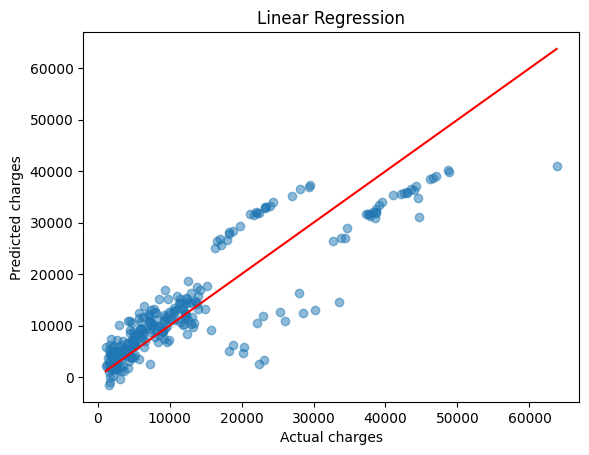

In [20]:
LR_preds = LR.predict(val_X)
plt.scatter(val_y, LR_preds, alpha=0.5)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], color='red')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Linear Regression')
plt.show()

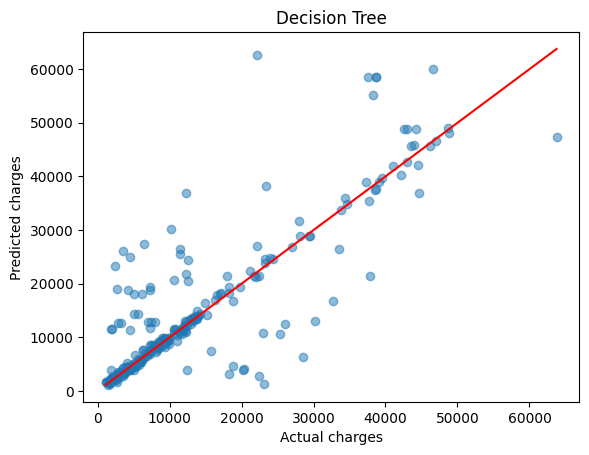

In [21]:
DTR_preds = DTR.predict(val_X)
plt.scatter(val_y, DTR_preds, alpha=0.5)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], color='red')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Decision Tree')
plt.show()

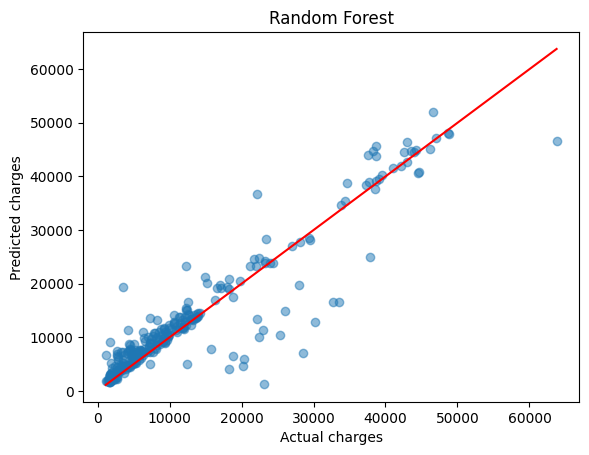

In [22]:
RF_preds = RF.predict(val_X)
plt.scatter(val_y, RF_preds, alpha=0.5)
plt.plot([val_y.min(), val_y.max()],
        [val_y.min(), val_y.max()],
        color='red'),
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Random Forest')
plt.show()

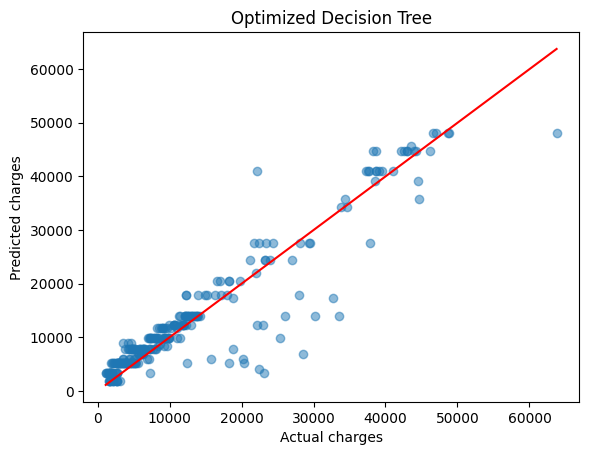

In [23]:
DT_Bayes_preds = DT_Bayes.predict(val_X)
plt.scatter(val_y, DT_Bayes_preds, alpha=0.5)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], color='red')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Optimized Decision Tree')
plt.show()

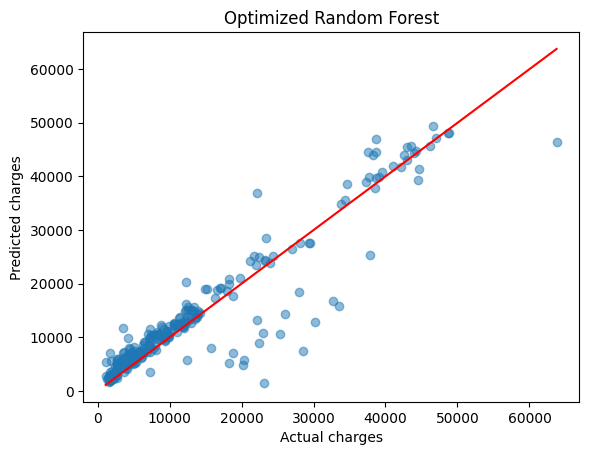

In [24]:
RF_Bayes_preds = RF_Bayes.predict(val_X)
plt.scatter(val_y, RF_Bayes_preds, alpha=0.5)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], color='red')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Optimized Random Forest')
plt.show()

#### **1.72 Residuals Visualization**
---
Residuals = actual - predicted data

If the residuals are close to zero, then the model is likely performing well. Patterns forming on residuals indicate problems.

Reference: (https://www.geeksforgeeks.org/python/how-to-create-a-residual-plot-in-python/)

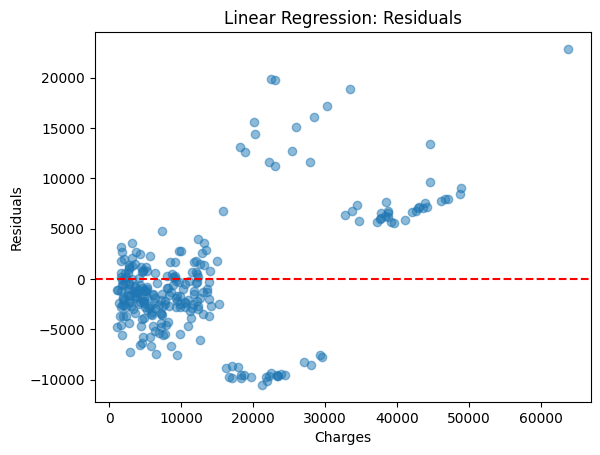

In [25]:
LR_res = val_y - LR_preds
plt.scatter(val_y, LR_res, alpha=0.5,)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Charges')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals')
plt.show()

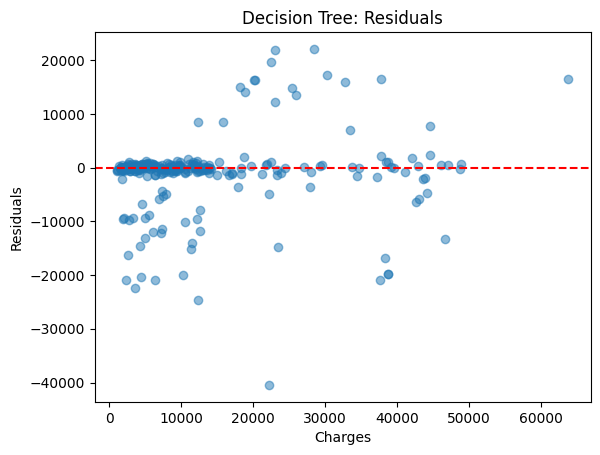

In [26]:
DTR_res = val_y - DTR_preds
plt.scatter(val_y, DTR_res, alpha=0.5,)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Charges')
plt.ylabel('Residuals')
plt.title('Decision Tree: Residuals')
plt.show()

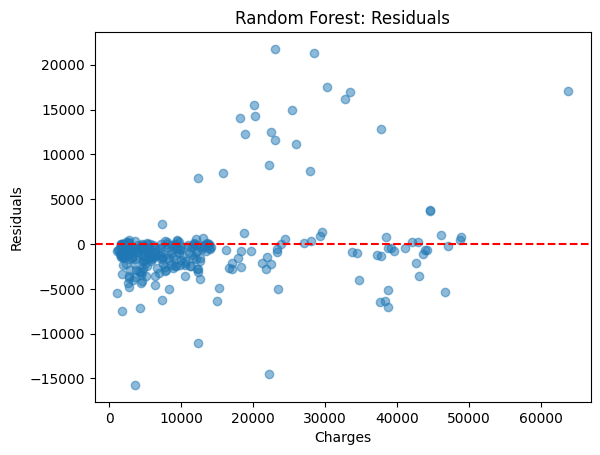

In [27]:
RF_res = val_y - RF_preds
plt.scatter(val_y, RF_res, alpha=0.5,)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Charges')
plt.ylabel('Residuals')
plt.title('Random Forest: Residuals')
plt.show()

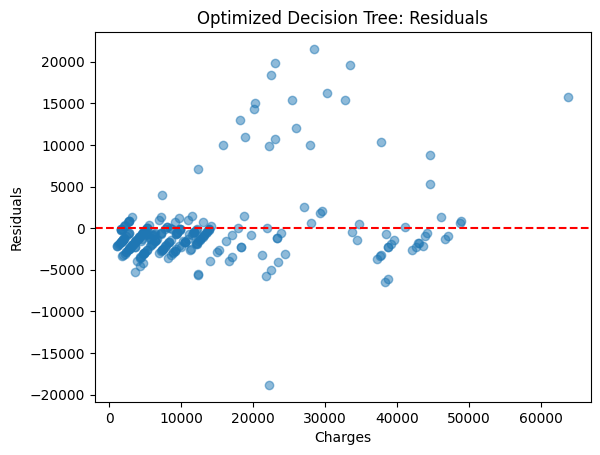

In [28]:
DTB_res = val_y - DT_Bayes_preds
plt.scatter(val_y, DTB_res, alpha=0.5,)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Charges')
plt.ylabel('Residuals')
plt.title('Optimized Decision Tree: Residuals')
plt.show()

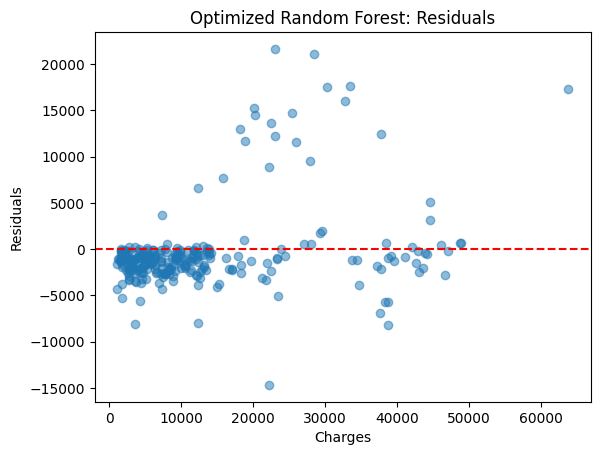

In [29]:
RFB_res = val_y - RF_Bayes_preds
plt.scatter(val_y, RFB_res, alpha=0.5,)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Charges')
plt.ylabel('Residuals')
plt.title('Optimized Random Forest: Residuals')
plt.show()

## **2. Deliverables**

### **2.1 Dataset Description**
The dataset this ML problem is trained on is from the Medical Insurance Cost Dataset by Mosap Abdel-Ghany here on Kaggle (https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset). 

The dataset contains 1338 rows and 7 columns, with 4 numerical features and 3 categorical features. The dataset has already been cleaned beforehand so there are no invalid data. The numerical features are: age, bmi, children, and charges. The categorical features are: sex, smoker, and region.

### **2.2 Preprocessing**
#### 2.2a One-hot encoding
The 3 categorical features, sex, smoker, and region have to undergo Pandas’ pd.getdummies() method, which will turn them into numerical features.

#### 2.2b Splitting data
The train_test_split() method from sklearn is used to obtain the values for train_X, val_X, train_y, and val_y.

### **2.3 Model Implementation**
#### 2.3a Fitting Models
Sklearn’s model.fit() method was used alongside the split data, wherein three different variables, each representing different models such as LR for Linear Regression, DTR for Decision Tree Regressor, and RF for Random Forest.

#### 2.3b Checking Model Performance
An evaluate function was made containing the model.predict(), r2_score(), mean_absolute_error(), mean_squared_error(), np.sqrt(mean_squared_error()) methods, which were returned to use as arguments for evaluating training and validation data. The training and validation scores were separated for later interpretation.

#### 2.3c Optimizing Models
The Bayesian Optimization library was used for effectively finding the optimal hyperparameters for the Optimized Decision Tree and Random Forest models after installing it from the console. Afterwards, the maximize() method’s results from the library were used as hyperparameters for the Decision Tree and Random Forest models’ new variables.

#### 2.3d Checking Optimized Model Performance
The evaluate function earlier was called on the new variables, and the code was adapted accordingly.

### **2.4 Results**
The results are as follows:

#### <u>Linear Regression</u>

**Train:**

R²: 0.742

MAE: 4,208.23

MSE: 37,277,681.70

RMSE: 6,105.55

**Validation:**

R²: 0.784

MAE: 4,181.19

MSE: 33,596,915.85

RMSE: 5,796.28

#### <u>Decision Tree</u>

**Train:**

R²: 0.998

MAE: 29.57

MSE: 244,239.55

RMSE: 494.21

**Validation:**

R²: 0.721

MAE: 3,206.26

MSE: 43,246,514.96

RMSE: 6,576.21

#### <u>Random Forest</u>

**Train:**

R²: 0.974

MAE: 1,067.49

MSE: 3,701,163.95

RMSE: 1,923.84

**Validation:**

R²: 0.861

MAE: 2,578.30

MSE: 21,567,207.59

RMSE: 4,644.05

#### <u>Optimized Decision Tree</u>

**Train:**

R²: 0.873

MAE: 2,420.59

MSE: 18,311,904.31

RMSE: 4,279.24

**Validation:**

R²: 0.867

MAE: 2,646.49

MSE: 20,594,594.98

RMSE: 4,538.13

#### <u>Optimized Random Forest</u>

**Train:**

R²: 0.924

MAE: 1,842.33

MSE: 10,936,379.26

RMSE: 3,307.02

**Validation:**

R²: 0.872

MAE: 2,542.78

MSE: 19,878,928.21

RMSE: 4,458.58


### **2.5 Interpretation**
#### 2.5a Metrics Interpretation
Since the training and validation scores are provided, interpreting the performances of each model can now be done properly. Their performances will be checked using their **R²**, **MAE**, and **RMSE**. With **R²**, higher values are better, as it means the model captures the trends accurately. **MAE** is regarding the average of the absolute differences between the predicted and actual charges, which still applies to the train and validation sets. **RMSE** is similar to **MAE**, but penalizes large errors more; lower is better for both **MAE** and **RMSE**.

#### 2.5b Visualization Interpretation
Scatterplot visualizations of models and their residuals were provided to help with further data interpretation. The first part of the visualizations on the models was used to see how much the models under- or overpredicted the charges. The second part of the visualizations, the residuals, helps evaluate the fit and assumptions of a model. These help further determine if the model is reliable or if there are any other problems.

#### 2.51 Linear Regression
The gap between the train and validation's R² scores is 0.042, which is relatively small. Overall, the validation metrics are slightly better than the training metrics. The close difference between the two metrics suggests that the model behaves consistently on seen and unseen data, and generalizes decently.

In the scatterplot visualization, the predictions generally follow the reference line but start to drift at higher values. The residual plot shows clear patterns and increasing errors, indicating that the model makes consistent mistakes rather than random ones. It also could explain that the model is not advanced enough to recognize the underlying patterns.

#### 2.52 Decision Tree
The gap between the train and validation's R² scores is 0.277, which is a lot and indicates that the model is strongly overfitting. The MAE, MSE, and RMSE scores for the training set are incredibly low, with the R² score being close to 1. It shows the Decision Tree model fits the training data extremely well, but that means it might not perform as well on unseen data. Overall, the large discrepancy between the training and validation results suggests that the model is inconsistent and cannot generalize reliably.

In the scatterplot visualization, the predictions generally follow the reference line but are scattered for higher values. The residual plot shows large and uneven errors, which supports the conclusion that the model overfits and struggles to generalize.

#### 2.53 Random Forest
The gap between the train and validation R² scores is 0.113, which indicates the model performs better on training data than unseen data. The strong R², MAE, MSE, and RMSE metrics on the training set shows that the Random Forest model captures the patterns in the data well. The validation metrics show good scores, suggesting that the model explains unseen data decently. Overall, while there is a noticeable difference between training and validation performance, it is not alarming enough to brand the model as unreliable since it generalizes pretty well.

In the scatterplot visualization, most predictions generally follow the reference line. The residual plot shows that the errors are mostly centered around zero.

#### 2.54 Optimized Decision Tree
The gap between the train and validation R² scores is 0.006, which is very small and indicates stable performance across the datasets. The close similarity between the training and validation metrics suggests that the model generalizes well to unseen data. Compared to its unoptimized variant, this version shows improved stability and reduced overfitting. Overall, it looks like the model is good and reliable enough to be used as a medical insurance cost predictor.

The scatterplot visualization show a cleaner alignment compared to its unoptimized variant, with fewer extreme deviations. The residual plot errors are more evenly distributed, indicating reduced overfitting and more stable predictions.

#### 2.55 Optimized Random Forest
The gap between the train and validation R² scores is 0.052, indicating consistent performance between seen and unseen data. Although the difference between the train and validation metrics is technically larger compared to the Optimized Decision Tree's results, the validation performance is stronger. This suggests that the Optimized Random Forest model generalizes better in practice. Overall, it is a good pick to use as a predictor model for the medical insurance cost regression problem.

In the scatterplot visualization, the predictions closely follow the reference line with lesser spread compared to its unoptimized variant. The residual plot errors seem to be more slightly clustered around zero now.

### **2.6 Critical Reflection**

Creating this Medical Insurance Cost prediction tool was a rather surprising experience compared to my attempt at doing a time-based split regression task, which was used in my assessment a few months ago. In this assessment, I was able to create a Medical Insurance Cost prediction tool with 3 models and 2 optimized variants, wherein a Gradio interface was provided to provide an area wherein users could input the provided features, which is very helpful in scenarios where it can be shared online, as anyone can use it without having to understand code. I say that it is surprising because I found myself trying to make a regression task interesting, since classification tasks like face-tracking seem more impressive than regression tasks. Impressions aside, they do solve different problems, which means that neither is “better” than the other. Compared to my previous regression task, this assessment output provides a tool that can be used by the public to find predictions that they don't just brush away like they would in the other task.

While I could have just settled with three models and built the Gradio interface with those, I felt that it was too lacking for a regression task, and especially for something that targets a real-world problem like this. I had to know whether the models were performing reliably enough that they could be used to prepare someone with their funding rather than lowball or highball their estimates. That meant I had to optimize the models by tuning the hyperparameters. To get them, my options were to use Random Search, Grid Search, and Bayesian Optimization. I decided on Bayesian Optimization because it was the most efficient and fastest method to get the best hyperparameters to use for the optimized models. Those hyperparameters were then used on the Decision Tree and Random Forest models. All the models had to be evaluated as well to see their performances and see if the optimization process worked out well, which is why the training and validation data sets were evaluated to find the gaps between their metrics to see if the models were fitted correctly.

I think I was able to work on the Machine Learning regression problem decently, although there are some gaps that I cannot currently recognize just plainly due to having early experience and knowledge. Working on this regression task, especially with Gradio, has opened up venues of interest for me to further test my curiosity with Machine Learning and AI that I may end up following through even after this module is over.